**Computational Intelligence Project <br>
Handwritten Digit Recognotion <br>
Amirhossein Rajabpour <br>
Fall 2021**

## **Step One: Getting the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Computer Intelligence Course/Project 1'

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

In [ ]:
# Reading The Train Set
train_images_file = open(base_dir + '/train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open(base_dir + '/train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))

In [ ]:
# Reading The Test Set
test_images_file = open(base_dir + '/t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open(base_dir + '/t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))

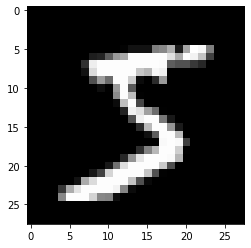

5


In [ ]:
# Plotting an image
show_image(train_set[0][0])
plt.show()
print(np.argmax(train_set[0][1]))

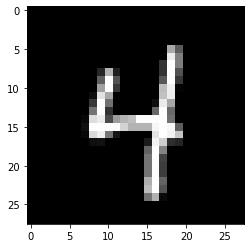

4


In [ ]:
show_image(test_set[19][0])
plt.show()
print(np.argmax(test_set[19][1]))

In [ ]:
train_df = pd.DataFrame(data=train_set)
train_df.info

<bound method DataFrame.info of                                                        0                                                  1
0      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  [[0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0....
1      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  [[1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
2      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  [[0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0....
3      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  [[0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0....
4      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
...                                                  ...                                                ...
59995  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
59996  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  [[0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.

In [ ]:
test_df = pd.DataFrame(data=test_set)
test_df.shape

(10000, 2)

## **Step Two: Feedforward**

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def feedforward(W, a, b, activation_func):
  z = (W @ a) + b
  if activation_func == 'sigmoid':
    return sigmoid(z)
  elif activation_func == 'leaky-relu':
    return np.where(z > 0, z, z * 0.01)

Allocating `W` matrix and vector `b` for each layer <br>

In [ ]:
W_1 = np.random.standard_normal(size=(16, 784))
b_1 = np.zeros((16, 1))

W_2 = np.random.standard_normal(size=(16, 16))
b_2 = np.zeros((16, 1))

W_3 = np.random.standard_normal(size=(10, 16))
b_3 = np.zeros((10, 1))

First feedforward on the first 100 images and see the result

In [ ]:
tmp_train_df = train_df[:][:100]

In [ ]:
true_ones = 0
for i in range(len(tmp_train_df)):
  a_1 = feedforward(W_1, tmp_train_df[0][i], b_1, 'sigmoid')
  a_2 = feedforward(W_2, a_1, b_2, 'sigmoid')
  a_3 = feedforward(W_3, a_2, b_3, 'sigmoid')

  if (np.argmax(a_3)) == (np.argmax(tmp_train_df[1][i])):
    true_ones += 1

In [ ]:
accuracy = int((true_ones/len(tmp_train_df)) * 100)
print('accuracy is:', accuracy, '%')

accuracy is: 10 %


Accuracy is very low. We just feedforward the network and didn't backpropagate.

## **Step Three: Backpropagation**

In [ ]:
def activation_deriv(x, activation_func):
  if activation_func == 'sigmoid':
    return sigmoid(x)*(1-sigmoid(x))
  elif activation_func == 'leaky-relu':
    return np.where(x < 0, 0.01, 1)

In [ ]:
def cost_calculator(a3, y):
  cost, s = 0, 0
  d1, d2 = a3.shape
  for d in range(d1):
    s = (a3[d,0] - y[d]) * (a3[d,0] - y[d])
    cost += s
  return cost

This function takes a **dataset** and our **weights** and **biases** (weights and biases are updated in Neural Network) and calculate the output for each image in dataset and then compare it with the actual labels in order to calculate the accuracy of our model. and returns the accuracy.

In [ ]:
def predict_and_accuracy_calculator(dataset, W, b, activation_func):
  true_ones = 0
  for image_index in range(len(dataset)):
    a_1 = feedforward(W[0], dataset[0][image_index], b[0], activation_func)
    a_2 = feedforward(W[1], a_1, b[1], activation_func)
    a_3 = feedforward(W[2], a_2, b[2], activation_func)
    if (np.argmax(a_3)) == (np.argmax(dataset[1][image_index])):
      true_ones += 1
  accuracy = (true_ones/len(dataset)) * 100
  return accuracy

Setting `learning rate`, `number of epochs` and `batch size`

In [ ]:
# alpha is our learning rate
alpha = 1
epoch_num = 20
batch_size = 10

Allocating `W` matrix and vector `b` for each layer <br>

In [ ]:
def initialize():
  W_1 = np.random.standard_normal(size=(16, 784))
  b_1 = np.zeros((16, 1))

  W_2 = np.random.standard_normal(size=(16, 16))
  b_2 = np.zeros((16, 1))

  W_3 = np.random.standard_normal(size=(10, 16))
  b_3 = np.zeros((10, 1))

  W = [W_1, W_2, W_3]
  b = [b_1, b_2, b_3]

  return W, b

In [ ]:
W, b = initialize()

In [ ]:
cost_arr = []
for e in range(epoch_num):
  np.random.shuffle(tmp_train_df.values)
  num_of_batches = int(np.ceil(len(tmp_train_df)/batch_size))
  for batch_index in range(num_of_batches):

    grad_W3 = np.zeros((10,16))
    grad_b3 = np.zeros((10,1))

    grad_W2 = np.zeros((16,16))
    grad_b2 = np.zeros((16,1))

    grad_W1 = np.zeros((16,784))
    grad_b1 = np.zeros((16,1))

    cost_batch = 0

    for image_index in range(batch_size*batch_index, batch_size*(batch_index+1)):

      # forward propagation
      a_1 = feedforward(W[0], tmp_train_df[0][image_index], b[0], 'sigmoid')
      a_2 = feedforward(W[1], a_1, b[1], 'sigmoid')
      a_3 = feedforward(W[2], a_2, b[2], 'sigmoid')

      cost_batch += cost_calculator(a_3, tmp_train_df[1][image_index])

      z_3 = (W[2] @ a_2) + b[2]
      z_2 = (W[1] @ a_1) + b[1]
      z_1 = (W[0] @ tmp_train_df[0][image_index]) + b[0]


      # backpropagation
      # for output layer
      for j in range(10):
        for k in range(16):
          grad_W3[j,k] += activation_deriv(z_3[j,0], 'sigmoid') * (2 * (a_3[j,0] - tmp_train_df[1][image_index][j])) * a_2[k,0]
          grad_b3[j,0] += activation_deriv(z_3[j,0], 'sigmoid') * (2 * (a_3[j,0] - tmp_train_df[1][image_index][j]))

      grad_a2 = np.zeros((16,1))
      for k in range(16):
        for j in range(10):
          grad_a2[k,0] += W[2][j,k] * activation_deriv(z_3[j,0], 'sigmoid') * (2 * ( a_3[j,0] - tmp_train_df[1][image_index][j]))

      # for hidden layer 2
      for j in range(16):
        for k in range(16):
          grad_W2[j,k] += activation_deriv(z_2[j,0], 'sigmoid') * grad_a2[j,0] * a_1[k,0]
          grad_b2[j,0] += activation_deriv(z_2[j,0], 'sigmoid') * grad_a2[j,0]

      grad_a1 = np.zeros((16,1))
      for k in range(16):
        for j in range(16):
          grad_a1[k,0] += W[1][j,k] * activation_deriv(z_2[j,0], 'sigmoid') * grad_a2[j,0]


      # for hidden layer 1
      for j in range(16):
        for k in range(784):
          grad_W1[j,k] += activation_deriv(z_1[j,0], 'sigmoid') * grad_a1[j,0] * tmp_train_df[0][image_index][k]
          grad_b1[j,0] += activation_deriv(z_1[j,0], 'sigmoid') * grad_a1[j,0]


    cost_arr.append(cost_batch)
    cost_batch = 0
    
    # upgrading W metrices and b vectores
    W[0] -= (alpha * (grad_W1/batch_size))
    W[1] -= (alpha * (grad_W2/batch_size))
    W[2] -= (alpha * (grad_W3/batch_size))

    b[0] -= (alpha * (grad_b1/batch_size))
    b[1] -= (alpha * (grad_b2/batch_size))
    b[2] -= (alpha * (grad_b3/batch_size))


It took almost 13 minutes to execute previous cell.

In [ ]:
accuracy = int(predict_and_accuracy_calculator(tmp_train_df, W, b, 'sigmoid'))
print('Accuracy of our model is:', accuracy, '%')

Accuracy of our model is: 26 %


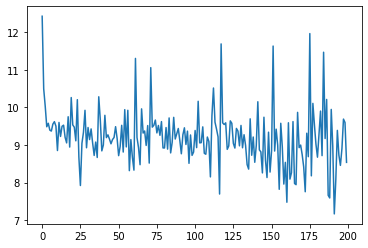

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_arr)
plt.show()

The Cost function is decreasing. So we know that our Neural Network is operating correctly. It is also fluctuating and thats because of minibatches. Cost is calculated after each mini batch and also weights and biases are updated after each mini batch.

## **Step Four: Vectorization**

Now we create the previous NN again but this time without loops. This time we're using **vectorization**

Allocating `W` matrix and vector `b` for each layer <br>

In [ ]:
W, b = initialize()

In [ ]:
def make_model(W, b, alpha, epoch_num, batch_size, data, activation_func):
  cost_arr = []
  for e in range(epoch_num):
    np.random.shuffle(data.values)
    num_of_batches = int(np.ceil(len(data)/batch_size))
    for batch_index in range(num_of_batches):

      grad_W3 = np.zeros((10,16))
      grad_b3 = np.zeros((10,1))

      grad_W2 = np.zeros((16,16))
      grad_b2 = np.zeros((16,1))

      grad_W1 = np.zeros((16,784))
      grad_b1 = np.zeros((16,1))

      cost_batch = 0
      
      for image_index in range(batch_size*batch_index, batch_size*(batch_index+1)):

        # forward propagation
        a_1 = feedforward(W[0], data[0][image_index], b[0], activation_func)
        a_2 = feedforward(W[1], a_1, b[1], activation_func)
        a_3 = feedforward(W[2], a_2, b[2], activation_func)

        cost_batch += cost_calculator(a_3, data[1][image_index])

        z_3 = (W[2] @ a_2) + b[2]
        z_2 = (W[1] @ a_1) + b[1]
        z_1 = (W[0] @ data[0][image_index]) + b[0]


        # backpropagation
        # for output layer
        grad_W3 += (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index])) @ (np.transpose(a_2))
        grad_b3 += (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index]))

        grad_a2 = np.zeros((16,1))
        grad_a2 = np.transpose(W[2]) @ (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index]))


        # for hidden layer 2
        grad_W2 += (activation_deriv(z_2, activation_func) * grad_a2) @ (np.transpose(a_1))
        grad_b2 += (activation_deriv(z_2, activation_func) * grad_a2)

        grad_a1 = np.zeros((16,1))
        grad_a1 = np.transpose(W[1]) @ (2 * activation_deriv(z_2, activation_func) * grad_a2)


        # for hidden layer 1
        grad_W1 += (activation_deriv(z_1, activation_func) * grad_a1) @ (np.transpose(data[0][image_index]))
        grad_b1 += (activation_deriv(z_1, activation_func) * grad_a1)


      cost_arr.append(cost_batch)
      cost_batch = 0

      # upgrading W metrices and b vectores
      W[0] -= (alpha * (grad_W1/batch_size))
      W[1] -= (alpha * (grad_W2/batch_size))
      W[2] -= (alpha * (grad_W3/batch_size))

      b[0] -= (alpha * (grad_b1/batch_size))
      b[1] -= (alpha * (grad_b2/batch_size))
      b[2] -= (alpha * (grad_b3/batch_size))

  return W, b, cost_arr


In [ ]:
W, b, cost_arr = make_model(W, b, alpha=1, epoch_num=200, batch_size=10, data=train_df[:][:100], activation_func='sigmoid')

It took only 10 seconds to execute. The same NN with more epochs but implemented with **vectorization**

In [ ]:
accuracy = predict_and_accuracy_calculator(tmp_train_df, W, b, 'sigmoid')
print('Accuracy of our model for training set is:', accuracy)

Accuracy of our model for training set is: 100.0


cool!!

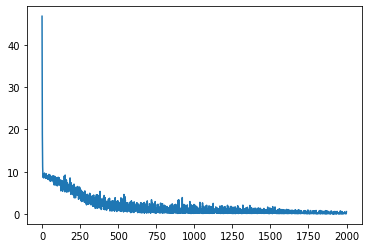

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_arr)
plt.show()

## **Step Five: Testing the Model**

Now we are taking the whole dataset as the input and iterate over all images.

Allocating `W` matrix and vector `b` for each layer <br>

In [ ]:
W, b = initialize()

In [ ]:
W, b, cost_arr = make_model(W, b, alpha=1, epoch_num=5, batch_size=50, data=train_df, activation_func='sigmoid')

It took about 4 minutes to execute the above cell.

In [ ]:
train_accuracy = int(predict_and_accuracy_calculator(train_df, W, b, 'sigmoid'))
print('Accuracy of our model for train set is:', train_accuracy, '%')

Accuracy of our model for train set is: 92 %


In [ ]:
test_accuracy = int(predict_and_accuracy_calculator(test_df, W, b, 'sigmoid'))
print('Accuracy of our model for test set is:', test_accuracy, '%')

Accuracy of our model for test set is: 91 %


 92% accuracy for training set and 91% accuracy for test set.

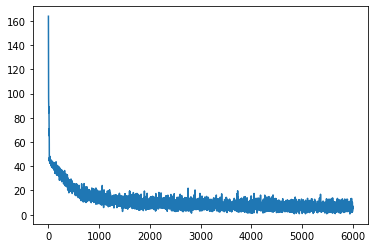

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_arr)
plt.show()

## **Extra Points**

## **Shifting the Images**

Adding four black rows at the top of the image and shift 4 rows downwards.

In [ ]:
def add_four_black_column(image):
  for i in range(112):
    image = np.insert(image, 0, 0.0)
  image = np.reshape(image[:-112], (784,1))
  return image

In [ ]:
for i in range(len(test_df)):
  new_image = add_four_black_column(test_df[0][i])
  test_df[0][i] = new_image

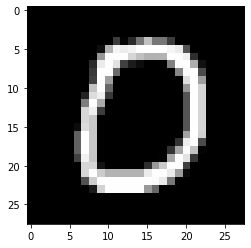

In [ ]:
show_image(test_set[10][0])
plt.show()

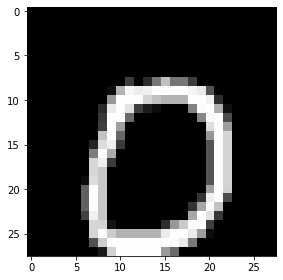

In [ ]:
from skimage import io
data = np.reshape(test_df[0][10], (28,28))
io.imshow(data)

We can see that the number is not in the center of the picture anymore.

In [ ]:
W, b = initialize()

In [ ]:
W, b, cost_arr = make_model(W, b, alpha=1, epoch_num=5, batch_size=50, data=train_df, activation_func='sigmoid')

In [ ]:
test_accuracy = int(predict_and_accuracy_calculator(test_df, W, b, 'sigmoid'))
print('Accuracy of our model for test set is:', test_accuracy, '%')

Accuracy of our model for test set is: 13 %


With a small change in the test data set, our model was not able to recognize numbers like before. Just a simple `Adversarial attack`!

## **Sigmoid vs Leaky ReLU**

In [ ]:
def RAI(fan_in, fan_out):
    V = np.random.randn(fan_out, fan_in + 1) * 0.6007 / fan_in ** 0.5
    for j in range(fan_out):
        k = np.random.randint(0, high=fan_in + 1)
        V[j, k] = np.random.beta(2, 1)
    W = V[:, :-1]
    b = np.reshape(V[:, -1], (fan_out, 1))
    return W.astype(np.float32), b.astype(np.float32)

In this section, I use `Leaky ReLU` inseatd of sigmoid for activation function

In [ ]:
W_1 = np.random.normal(0, 2 / 784, size=(16, 784))
b_1 = np.zeros((16, 1))
    
W_2, b_2 = RAI(16, 16)

W_3, b_3 = RAI(16, 10)

W = [W_1, W_2, W_3]
b = [b_1, b_2, b_3]

In [ ]:
W, b, cost_arr = make_model(W, b, alpha=0.01, epoch_num=5, batch_size=50, data=train_df, activation_func='leaky-relu')

In [ ]:
train_accuracy = int(predict_and_accuracy_calculator(train_df, W, b, 'leaky-relu'))
print('Accuracy of our model for train set is:', train_accuracy, '%')

Accuracy of our model for train set is: 93 %


`test_df` should be created again because in the previous section i shifted the images.

In [ ]:
test_df = pd.DataFrame(data=test_set)

In [ ]:
test_accuracy = int(predict_and_accuracy_calculator(test_df, W, b, 'leaky-relu'))
print('Accuracy of our model for test set is:', test_accuracy, '%')

Accuracy of our model for test set is: 93 %


`Leaky ReLU` worked well! Accuracy is a bit higher than `Sigmoid` activation.

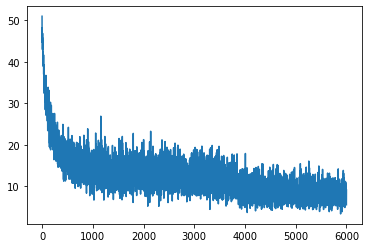

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_arr)
plt.show()

## **Modified SGD (SGD with momentum)**

In [ ]:
# alpha is our learning rate
alpha = 0.01
epoch_num = 5
batch_size = 50

In [ ]:
W, b = initialize()

In [ ]:
data = train_df
activation_func = 'sigmoid'
beta = 0.7     # hyperparameter for momentum gradient descent

v_d_W3 = np.zeros((10,16))
v_d_b3 = np.zeros((10,1))

v_d_W2 = np.zeros((16,16))
v_d_b2 = np.zeros((16,1))

v_d_W1 = np.zeros((16,784))
v_d_b1 = np.zeros((16,1))

cost_arr = []
for e in range(epoch_num):
  np.random.shuffle(data.values)
  num_of_batches = int(np.ceil(len(data)/batch_size))
  for batch_index in range(num_of_batches):

    grad_W3 = np.zeros((10,16))
    grad_b3 = np.zeros((10,1))

    grad_W2 = np.zeros((16,16))
    grad_b2 = np.zeros((16,1))

    grad_W1 = np.zeros((16,784))
    grad_b1 = np.zeros((16,1))

    cost_batch = 0
    
    for image_index in range(batch_size*batch_index, batch_size*(batch_index+1)):

      # forward propagation
      a_1 = feedforward(W[0], data[0][image_index], b[0], activation_func)
      a_2 = feedforward(W[1], a_1, b[1], activation_func)
      a_3 = feedforward(W[2], a_2, b[2], activation_func)

      cost_batch += cost_calculator(a_3, data[1][image_index])

      z_3 = (W[2] @ a_2) + b[2]
      z_2 = (W[1] @ a_1) + b[1]
      z_1 = (W[0] @ data[0][image_index]) + b[0]


      # backpropagation
      # for output layer
      grad_W3 += (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index])) @ (np.transpose(a_2))
      grad_b3 += (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index]))

      grad_a2 = np.zeros((16,1))
      grad_a2 = np.transpose(W[2]) @ (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index]))


      # for hidden layer 2
      grad_W2 += (activation_deriv(z_2, activation_func) * grad_a2) @ (np.transpose(a_1))
      grad_b2 += (activation_deriv(z_2, activation_func) * grad_a2)

      grad_a1 = np.zeros((16,1))
      grad_a1 = np.transpose(W[1]) @ (2 * activation_deriv(z_2, activation_func) * grad_a2)


      # for hidden layer 1
      grad_W1 += (activation_deriv(z_1, activation_func) * grad_a1) @ (np.transpose(data[0][image_index]))
      grad_b1 += (activation_deriv(z_1, activation_func) * grad_a1)

    cost_arr.append(cost_batch)
    cost_batch = 0
    
    # updating W metrices and b vectores
    W[0] -= (alpha * v_d_W1)
    W[1] -= (alpha * v_d_W2)
    W[2] -= (alpha * v_d_W3)

    b[0] -= (alpha * v_d_b1)
    b[1] -= (alpha * v_d_b2)
    b[2] -= (alpha * v_d_b3)

    # updating V's
    v_d_W1 = (beta * grad_W1)
    v_d_W2 = (beta * grad_W2)  
    v_d_W3 = (beta * grad_W3)  

    v_d_b1 = (beta * grad_b1)  
    v_d_b2 = (beta * grad_b2)  
    v_d_b3 = (beta * grad_b3) 

In [ ]:
accuracy = int(predict_and_accuracy_calculator(train_df, W, b, 'sigmoid'))
print('Accuracy of our model for training set is:', accuracy, '%')

Accuracy of our model for training set is: 87 %


In [ ]:
accuracy = int(predict_and_accuracy_calculator(test_df, W, b, 'sigmoid'))
print('Accuracy of our model for test set is:', accuracy, '%')

Accuracy of our model for test set is: 87 %


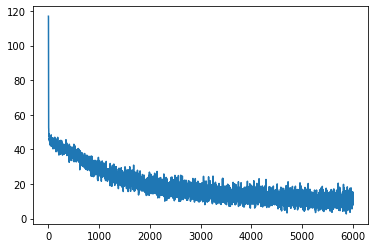

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_arr)
plt.show()

another way

In [ ]:
W, b = initialize()

In [ ]:
data = train_df
activation_func = 'sigmoid'
beta = 0.9     # hyperparameter for momentum gradient descent

cost_arr = []
for e in range(epoch_num):
  np.random.shuffle(data.values)
  num_of_batches = int(np.ceil(len(data)/batch_size))
  for batch_index in range(num_of_batches):

    grad_W3 = np.zeros((10,16))
    grad_b3 = np.zeros((10,1))

    grad_W2 = np.zeros((16,16))
    grad_b2 = np.zeros((16,1))

    grad_W1 = np.zeros((16,784))
    grad_b1 = np.zeros((16,1))

    v_d_W3 = np.random.standard_normal(size=(10, 16))
    v_d_b3 = np.zeros((10,1))

    v_d_W2 = np.random.standard_normal(size=(16, 16))
    v_d_b2 = np.zeros((16,1))

    v_d_W1 = np.random.standard_normal(size=(16, 784))
    v_d_b1 = np.zeros((16,1))

    cost_batch = 0
    
    for image_index in range(batch_size*batch_index, batch_size*(batch_index+1)):

      # forward propagation
      a_1 = feedforward(W[0], data[0][image_index], b[0], activation_func)
      a_2 = feedforward(W[1], a_1, b[1], activation_func)
      a_3 = feedforward(W[2], a_2, b[2], activation_func)

      cost_batch += cost_calculator(a_3, data[1][image_index])

      z_3 = (W[2] @ a_2) + b[2]
      z_2 = (W[1] @ a_1) + b[1]
      z_1 = (W[0] @ data[0][image_index]) + b[0]


      # backpropagation
      # for output layer
      grad_W3 += (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index])) @ (np.transpose(a_2))
      grad_b3 += (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index]))

      grad_a2 = np.zeros((16,1))
      grad_a2 = np.transpose(W[2]) @ (2 * activation_deriv(z_3, activation_func) * (a_3 - data[1][image_index]))


      # for hidden layer 2
      grad_W2 += (activation_deriv(z_2, activation_func) * grad_a2) @ (np.transpose(a_1))
      grad_b2 += (activation_deriv(z_2, activation_func) * grad_a2)

      grad_a1 = np.zeros((16,1))
      grad_a1 = np.transpose(W[1]) @ (2 * activation_deriv(z_2, activation_func) * grad_a2)


      # for hidden layer 1
      grad_W1 += (activation_deriv(z_1, activation_func) * grad_a1) @ (np.transpose(data[0][image_index]))
      grad_b1 += (activation_deriv(z_1, activation_func) * grad_a1)

      v_d_W1 = (beta * v_d_W1) + grad_W1
      v_d_b1 = (beta * v_d_b1) + grad_b1
      
      v_d_W2 = (beta * v_d_W2) + grad_W2
      v_d_b2 = (beta * v_d_b2) + grad_b2
      
      v_d_W3 = (beta * v_d_W3) + grad_W3
      v_d_b3 = (beta * v_d_b3) + grad_b3


    cost_arr.append(cost_batch)
    cost_batch = 0

    # upgrading W metrices and b vectores
    W[0] -= (alpha * v_d_W1)
    W[1] -= (alpha * v_d_W2)
    W[2] -= (alpha * v_d_W3)

    b[0] -= (alpha * v_d_b1)
    b[1] -= (alpha * v_d_b2)
    b[2] -= (alpha * v_d_b3)

In [ ]:
accuracy = int(predict_and_accuracy_calculator(train_df, W, b, 'sigmoid'))
print('Accuracy of our model for training set is:', accuracy, '%')

Accuracy of our model for training set is: 92 %


In [ ]:
accuracy = int(predict_and_accuracy_calculator(test_df, W, b, 'sigmoid'))
print('Accuracy of our model for test set is:', accuracy, '%')

Accuracy of our model for test set is: 92 %


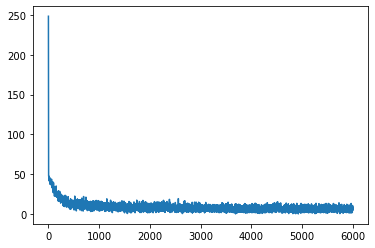

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_arr)
plt.show()

Cost function decreased **faster** than normal SGD. Also the accuracy is a bit higher than the model with normal SGD.

